<!-- PROFILE LINK -->

<h1 style = "text-align:center; font-size: 30px">PROGRAMACIÓN CONCURRENTE Y DISTRIBUIDA</h1>
<a href ="https://github.com/mariogutierrezlopez">
<img src="https://avatars.githubusercontent.com/u/102418143?v=4" style="float:left;vertical-align:centre" width="110" height="110" title = "Mario Gutiérrez López 22102041">
<a href ="https://github.com/mariogutierrezlopez?tab=repositories">
<img src="https://media-exp1.licdn.com/dms/image/C4D0BAQEu_Aa76fcmPw/company-logo_200_200/0/1630998679429?e=2159024400&v=beta&t=2feC9GG7RWCWizTqsK5HzDWB1TL2DOQuAVwnMf6FFvk" title = "M21" alt="UE" width="110" height="110" style="float:right;vertical-align:centre">


# Hands on 05 

In [3]:
import random # Para generar num. aleatorios en la A y B 
import math
import multiprocessing as mp # Para trabajar en paralelo
import time

In [4]:
def sec_mult(A, B): # f() que calcula la mult. en secuencial, como toda la vida se ha hecho 
    C = [[0] * n_col_B for i in range(n_fil_A)] # Crear y poblar la matrix  C = A*B
    for i in range(n_fil_A): # Hago la multiplicacion de AxB = C, i para iterar sobre las filas de A
        for j in range(n_col_B): # j para iterar sobre las columnas de B
            for k in range(n_col_A): # k para iterar en C
                C[i][j] += A[i][k] * B[k][j] # Aqui se hace la multiplicación y guardo en C.
    return C


In [5]:

def par_mult(A, B): # f() que prepara el reparto de trabajo para la mult. en paralelo
    n_cores = mp.cpu_count() # Obtengo los cores de mi pc
    size_col = math.ceil(n_col_B/n_cores) # Columnas  a procesar x c/cpre, ver Excel adjunto
    size_fil = math.ceil(n_fil_A/n_cores) # Filas a procesar x c/cpre, ver Excel adjunto
    MC = mp.RawArray('i', n_fil_A * n_col_B) # Array MC de memoria compartida donde se almacenaran los resultados, ver excel adjunto
    cores = [] # Array para guardar los cores y su trabajo
    for core in range(n_cores):# Asigno a cada core el trabajo que le toca, ver excel adjunto
        i_MC = min(core * size_fil, n_fil_A) # Calculo i para marcar inicio del trabajo del core en relacion a las filas
        f_MC = min((core + 1) * size_fil, n_fil_A) # Calculo f para marcar fin del trabajo del core, ver excel
        cores.append(mp.Process(target=par_core, args=(A, B, MC, i_MC, f_MC)))# Añado al Array los cores y su trabajo
    for core in cores:
        core.start()# Arranco y ejecuto el trabajo para c/ uno de los cores que tenga mi equipo, ver excel
    for core in cores:
        core.join()# Bloqueo cualquier llamada hasta que terminen su trabajo todos los cores
    C_2D = [[0] * n_col_B for i in range(n_fil_A)] # Convierto el array unidimensional MC en una matrix 2D (C_2D) 
    for i in range(n_fil_A):# i para iterar sobre las filas de A
        for j in range(n_col_B):# j para iterar sobre las columnas de B
            C_2D[i][j] = MC[i*n_col_B + j] # Guardo el C_2D los datos del array MC
    return C_2D

In [6]:

def par_core(A, B, MC, i_MC, f_MC): # La tarea que hacen todos los cores
    for i in range(i_MC, f_MC): # Size representado en colores en el excel que itera sobre las filas en A
        for j in range(len(B[0])): # Size representado en colores en el excel que itera sobre las columnas en B
            for k in range(len(A[0])): # n_fil_B o lo que es l mismo el n_col_A
                MC[i*len(B[0]) + j] += A[i][k] * B[k][j]# Guarda resultado en MC[] de cada core


In [ ]:

if __name__ == '__main__':
    A = [[random.randint(0,215) for i in range(6)] for j in range(22102041)] # Genero A[22102041][6]con num. aleatorios del 0 al 215, ver excel 
    B = [[random.randint(0,215) for i in range(200)] for j in range(6)] # Genero B[6][22102041]con num. aleatorios del 0 al 215, ver excel
    n_fil_A = len(A) # Obtengo num de filas de A 
    n_col_A = len(A[0]) # Obtengo num de colunmas de A 
    n_fil_B = len(B) # Obtengo num de filas de B
    n_col_B = len(B[0]) # # Obtengo num de filas de B
    if n_col_A != n_fil_B: raise Exception('Dimensiones no validas') # Compruebo que se puedan multiplicar A y B
    inicioS = time.time()
    sec_mult(A, B) # Ejecuto multiplicacion secuencial
    finS = time.time()
    inicioP = time.time()
    par_mult(A, B) # Ejecuto multiplicacion paralela
    finP = time.time()
    print('\n\nMatriz  A y B se han multiplicado con exito en SECUENCIAL ha tardado ', finS-inicioS, ' y en PARALELO ', finP-inicioP)

In [11]:
from IPython import display as dp

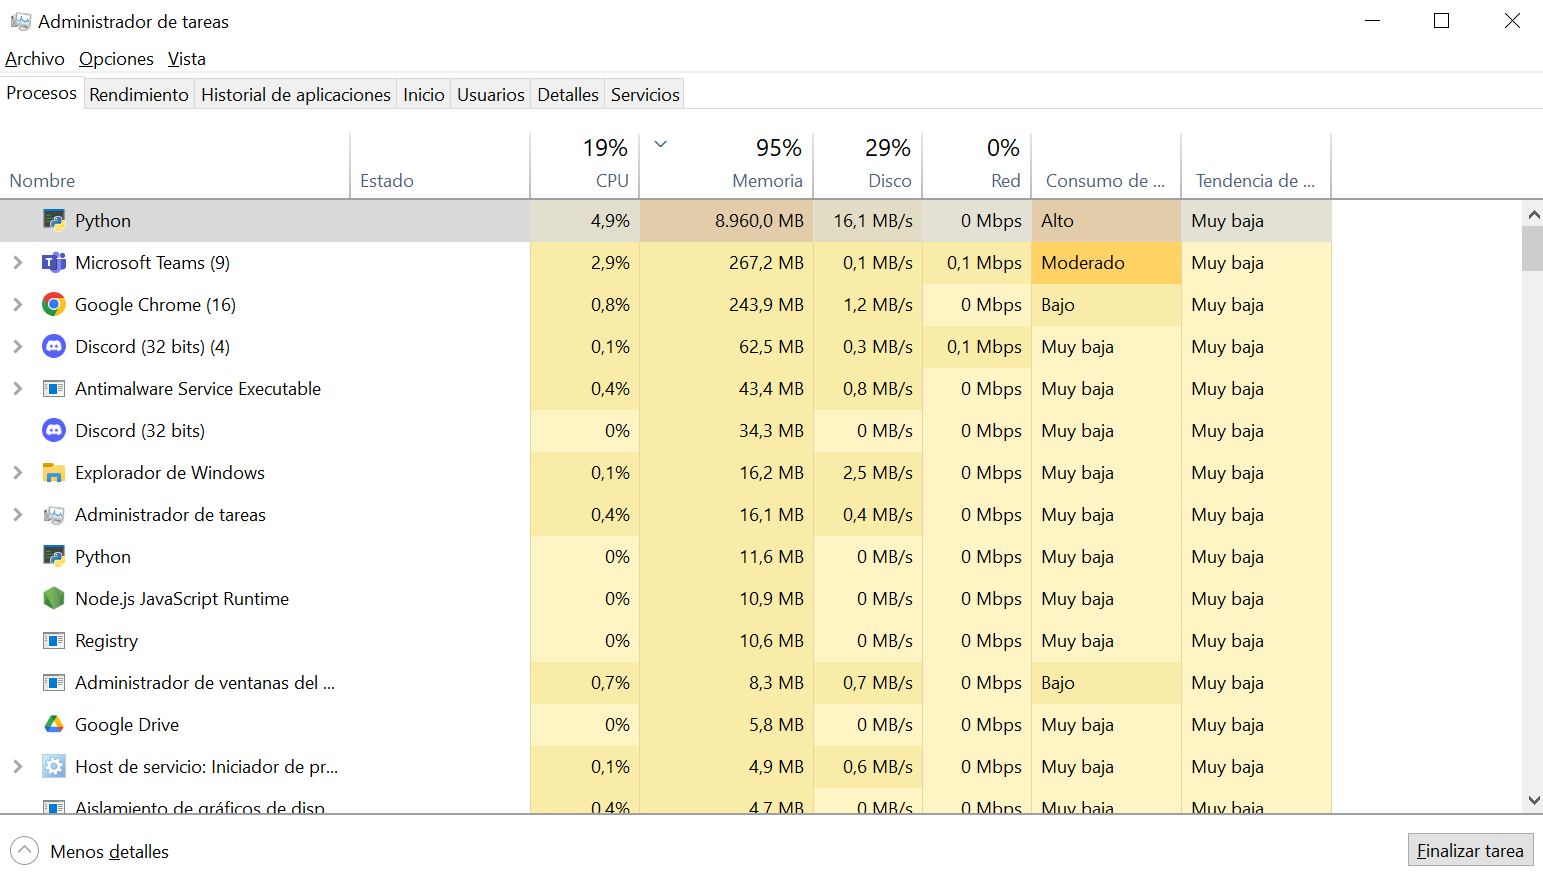

In [12]:
dp.Image("05TaskManager.png")